In [1]:
import matplotlib.pyplot as plt

import bluemira.geometry.tools
from bluemira.base.components import PhysicalComponent, GroupingComponent

import bluemira.display as display

from bluemira.display.plotter import (
    WirePlotter,
    FacePlotter,
)

from bluemira.geometry.parameterisations import PrincetonD
from bluemira.geometry.face import BluemiraFace

PATH_TO_FREECAD_LIBDIR not specified, using default FreeCAD version in /home/ivan/miniforge3/envs/bluemira/lib


## Setup

Creation of a closed wire and respective face and discretization points.

PrincetonD parametrisation is used as example.

Note: the curve is generated on the x-z plane

In [2]:
p = PrincetonD()
p.adjust_variable("x1", 4, lower_bound=3, upper_bound=5)
p.adjust_variable("x2", 16, lower_bound=10, upper_bound=20)
p.adjust_variable("dz", 0, lower_bound=0, upper_bound=0)
wire = p.create_shape()
face = BluemiraFace(wire)

## Default plotting

We can plot the list of points, as well as the BluemiraWire and BluemiraFace
in the following way, using the display built-in function with default settings

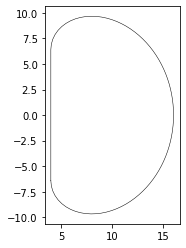

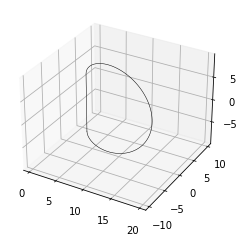

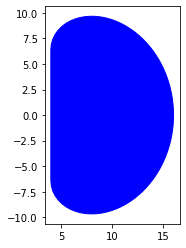

<AxesSubplot:>

In [3]:
display.plot_2d(wire)
display.plot_3d(wire)
display.plot_2d(face)


In a similar way, it is possible to use specific Plotters for each entity,
i.e. PointsPlotter, WirePlotter, and FacePlotter. For example:

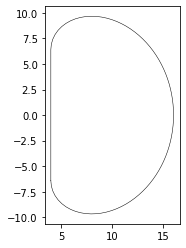

<AxesSubplot:>

In [4]:
plotter_2d = WirePlotter()
plotter_2d.plot_2d(wire)


## Modifying defaults

Default plot options can be obtained in form of a dictionary instancing one of the
plotters, e.g.:

In [5]:
my_options = display.plotter.get_default_options()
print(my_options)

{'show_points': False, 'show_wires': True, 'show_faces': True, 'point_options': {'s': 10, 'facecolors': 'red', 'edgecolors': 'black', 'zorder': 30}, 'wire_options': {'color': 'black', 'linewidth': '0.5', 'zorder': 20}, 'face_options': {'color': 'blue', 'zorder': 10}, 'plane': 'xz', 'ndiscr': 100, 'byedges': True}



Modifying the dictionary and passing it to a plot function will display the plot
with the new options

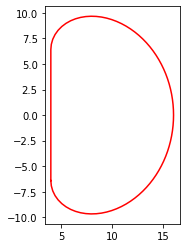

<AxesSubplot:>

In [6]:
my_options["wire_options"] = {"color": "red", "linewidth": "1.5"}
display.plot_2d(wire, **my_options)


Alternatively, plot options can be modified directly inside a Plotter, e.g.:

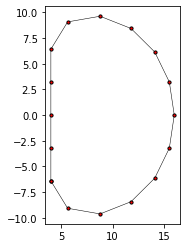

<AxesSubplot:>

In [7]:
plotter_2d.options.show_points = True
plotter_2d.options.ndiscr = 15
plotter_2d.plot_2d(wire)



Once you get familiar with the options, you can also make your own dictionaries, and
pass them to the plotting functions

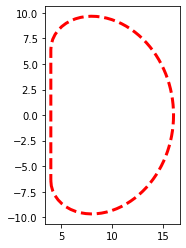

<AxesSubplot:>

In [8]:
my_options = {
    "show_points": False,
    "wire_options": {"color": "red", "linewidth": 3, "linestyle": "dashed"},
}
display.plot_2d(wire, **my_options)


Being matplotlib the default plot library, points_options, wire_options,
and face_options are equivalent to the **kwargs passed to the functions scatter,
plot, and fill, respectively.

Discretise the wire to an array of points.

In [9]:
points = wire.discretize(ndiscr=10, byedges=True)

## Points Plot

Simple plot of the obtained points.

A 2D plot with the built-in display functions

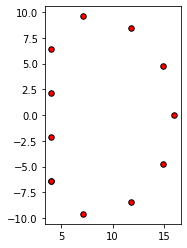

<AxesSubplot:>

In [10]:
display.plot_2d(
    points, point_options={"s": 30, "facecolors": "red", "edgecolors": "black"}
)
# or with a Plotter
# pplotter = PointsPlotter(
#     point_options={"s": 30, "facecolors": "red", "edgecolors": "black"}
# )
# pplotter.plot_2d(points)

## 3D Scatter Plot

A plot of the same points, but in 3D this time.

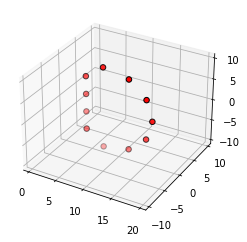

<Axes3DSubplot:>

In [11]:
display.plot_3d(
    points, point_options={"s": 30, "facecolors": "red", "edgecolors": "black"}
)

# pplotter = Plotter3D(
#      point_options={"s": 30, "facecolors": "red", "edgecolors": "black"}
# )
# pplotter.plot_3d(points)

## Wire Plot

A WirePlotter is used with the default setup with:

- plane = xz (this is the projection plane, not a section plane)
- point size = 20
- ndiscr = 15

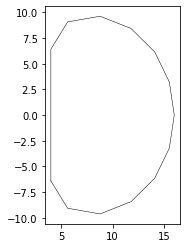

<AxesSubplot:>

In [12]:
wplotter = WirePlotter(plane="xz")
wplotter.options.point_options["s"] = 20
wplotter.options.ndiscr = 15
wplotter.plot_2d(wire)

## 3D Curve Plot

A plot of the same wire, but in 3D this time.

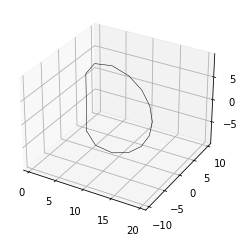

<Axes3DSubplot:>

In [13]:
display.plot_3d(wire, **wplotter.options.as_dict())

## Wire Plot with Matplotlib Default Options

In this example point_options is set to an empty dict. The default matplotlib are used.

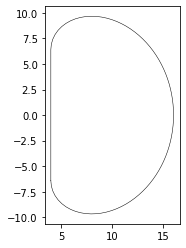

<AxesSubplot:>

In [14]:
display.plot_2d(wire, points_options={})
# The plot is immediately shown by default, so it is not possible to act on the plot

## Wire plot with some modifications

In this example, we choose our own matplotlib Axes onto which to plot, disable the
automatic display of the plot (show=False), and apply a title to the plot

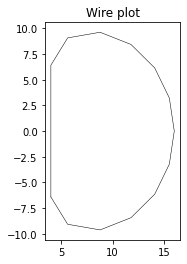

In [15]:
f, ax = plt.subplots()
wplotter.options.point_options = {}
wplotter.plot_2d(wire, ax=ax, show=False)
ax.set_title("Wire plot")
plt.show()

## Face Plot

A FacePlotter is used with the default setup with:

- plane = xz (this is the projection plane, not a section plane)
- ndiscr = 30
- plot title

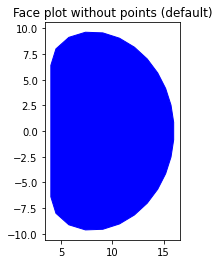

In [16]:
f, ax = plt.subplots()
fplotter = FacePlotter(plane="xz")
fplotter.options.ndiscr = 30
fplotter.plot_2d(face, ax=ax, show=False)
ax.set_title("Face plot without points (default)")
plt.show()

## Face Plot with Points

We've set the points to be deactivate by default, but we can enable them again for
individual plotters.

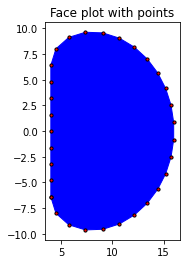

In [17]:
f, ax = plt.subplots()
fplotter = FacePlotter(plane="xz")
fplotter.options.ndiscr = 30
fplotter.options.show_points = True
fplotter.plot_2d(face, ax=ax, show=False)
ax.set_title("Face plot with points")
plt.show()

## Make a Second Face

A second geometry is created, surrounding our original face.

In [18]:
p2 = PrincetonD()
p2.adjust_variable("x1", 3.5, lower_bound=3, upper_bound=5)
p2.adjust_variable("x2", 17, lower_bound=10, upper_bound=20)
p2.adjust_variable("dz", 0, lower_bound=0, upper_bound=0)
wire2 = p2.create_shape()
face2 = BluemiraFace(wire2)

## Combined Face Plot

Face and face2 are plotted using the same FacePlotter. Since no plot options have
been changed, the two faces will be plotted in the same way (e.g. same color).

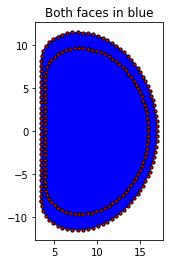

fplotter2.options: PlotOptions({'byedges': True,
 'face_options': {'color': 'blue'},
 'ndiscr': 100,
 'plane': ([BluemiraPlane] = Label: ,  base: [0.0, 0.0, 0.0],  axis: Vector (1.0, 0.0, 0.0),  angle: -90.0, ),
 'point_options': {'edgecolors': 'black',
                   'facecolors': 'red',
                   's': 10,
                   'zorder': 30},
 'show_faces': True,
 'show_points': True,
 'show_wires': False,
 'wire_options': {'color': 'black', 'linewidth': '0.5', 'zorder': 20}}
)


In [19]:
fplotter2 = FacePlotter(plane="xz")
fplotter2.options.show_points = True
fplotter2.options.face_options = {"color": "blue"}

f, ax = plt.subplots()
fplotter2.plot_2d(face, ax=ax, show=False)
fplotter2.plot_2d(face2, ax=ax, show=False)
ax.set_title("Both faces in blue")
plt.show()
print(f"fplotter2.options: {fplotter2.options}")

## Combined Face Plot with Different Colours

Plot both face with different colour.

Note: if face is plotted before face2, face2 will be "covered" by face.

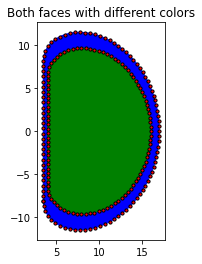

In [20]:
f, ax = plt.subplots()
fplotter2.options.face_options = {"color": "blue"}
fplotter2.plot_2d(face2, ax=ax, show=False)
fplotter2.options.face_options = {"color": "green"}
fplotter2.plot_2d(face, ax=ax, show=False)
ax.set_title("Both faces with different colors")
plt.show()

## Face with Hole

A third face is create as difference between face and face2 (a BluemiraFace object
has been created using wire2 as outer boundary and wire as inner boundary).

Note:
- when plotting points, it can happen that markers are not centred properly as
      described in https://github.com/matplotlib/matplotlib/issues/11836
- face3 is created with a wire deepcopy in order to be able to modify face and face2
(and thus wire and wire2) without modifying face3

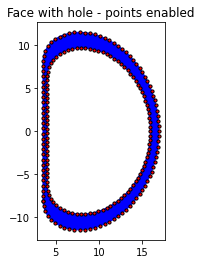

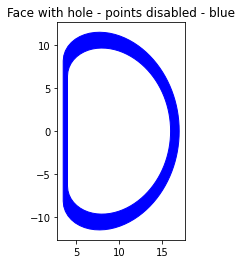

In [21]:
f, ax = plt.subplots()
face3 = BluemiraFace([wire2.deepcopy(), wire.deepcopy()])
fplotter3 = FacePlotter(plane="xz")
fplotter3.options.show_points = True
ax = fplotter3.plot_2d(face3, ax=ax, show=False)
ax.set_title("Face with hole - points enabled")
plt.show()

f, ax = plt.subplots()
fplotter3.options.face_options["color"] = "blue"
fplotter3.options.show_points = False
fplotter3.plot_2d(face3, ax=ax, show=False)
ax.set_title("Face with hole - points disabled - blue")
plt.show()

## Perform Some Face Operations

Scale and move our face

In [22]:
bari = face.center_of_mass
face.scale(0.5)
new_bari = face.center_of_mass
diff = bari - new_bari
v = (diff[0], diff[1], diff[2])
face.translate(v)

## Wires and Faces

Create and plot a couple of Wires and then create and plot the corresponding Faces.

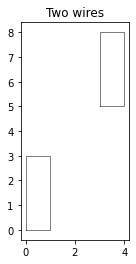

In [23]:
points = [[0, 0, 0], [1, 0, 0], [1, 0, 3], [0, 0, 3]]
wire = bluemira.geometry.tools.make_polygon(points, closed=True)
wire1 = wire.deepcopy()
wire1.translate((3, 0, 5))
wplotter = WirePlotter(plane="xz")
ax = wplotter.plot_2d(wire, show=False)
ax = wplotter.plot_2d(wire1, ax=ax, show=False)
ax.set_title("Two wires")
plt.show()

## Plots with Matplotlib Default Point Options

Plot the points on a boundary of a face with matplotlib defaults.

Note that, since point_options = {}, points color is automatically changed by
matplotlib.

In [24]:
wface = BluemiraFace(wire)
w1face = BluemiraFace(wire1)

## PhysicalComponent Plot

Creates a `PhysicalComponent` and plots it in the xz plane

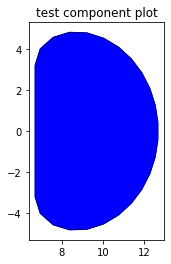

In [25]:
c = PhysicalComponent("Comp", face)
c.plot_options.plane = "xz"
c.plot_options.ndiscr = 30
ax = c.plot_2d(show=False)
ax.set_title("test component plot")
plt.show(block=True)

## GroupingComponent Plot

Creates a `GroupingComponent` and plots it in the xz plane using matplotlib defaults.
Here we override some defaults and make our custom set of plot options.

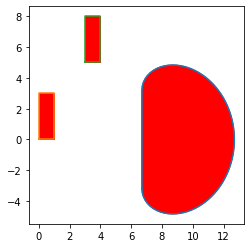

<AxesSubplot:>

In [26]:
group = GroupingComponent("Components")
my_group_options = group.plot_options.as_dict()
my_group_options["wire_options"] = {}
my_group_options["face_options"] = {"color": "red"}
c1 = PhysicalComponent("Comp1", face, parent=group)
c2 = PhysicalComponent("Comp2", wface, parent=group)
c3 = PhysicalComponent("Comp3", w1face, parent=group)
display.plot_2d(group, **my_group_options)

Note that, since wire_options = {}, wire color is automatically changed by matplotlib

## Component and BluemiraGeo Combined Plot

Plots a component on the same axes as a BluemiraFace.

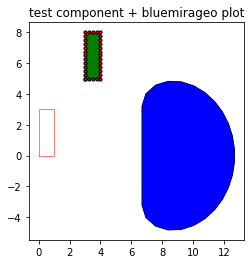

In [27]:
wplotter.options.wire_options["color"] = "red"
ax = wplotter.plot_2d(wface.boundary[0], show=False)
fplotter.options.face_options["color"] = "green"
fplotter.options.wire_options["color"] = "black"
ax = fplotter.plot_2d(w1face, ax=ax, show=False)
ax = c.plot_2d(ax=ax, show=False)
ax.set_title("test component + bluemirageo plot")
plt.show(block=True)

Show the options from our combined plot

In [28]:
print(f"wire plotter options: {wplotter.options}")
print(f"face plotter options: {fplotter.options}")
print(f"component plotter options: {c.plot_options}")

wire plotter options: PlotOptions({'byedges': True,
 'face_options': {'color': 'blue', 'zorder': 10},
 'ndiscr': 100,
 'plane': ([BluemiraPlane] = Label: ,  base: [0.0, 0.0, 0.0],  axis: Vector (1.0, 0.0, 0.0),  angle: -90.0, ),
 'point_options': {'edgecolors': 'black',
                   'facecolors': 'red',
                   's': 10,
                   'zorder': 30},
 'show_faces': True,
 'show_points': False,
 'show_wires': True,
 'wire_options': {'color': 'red', 'linewidth': '0.5', 'zorder': 20}}
)
face plotter options: PlotOptions({'byedges': True,
 'face_options': {'color': 'green', 'zorder': 10},
 'ndiscr': 30,
 'plane': ([BluemiraPlane] = Label: ,  base: [0.0, 0.0, 0.0],  axis: Vector (1.0, 0.0, 0.0),  angle: -90.0, ),
 'point_options': {'edgecolors': 'black',
                   'facecolors': 'red',
                   's': 10,
                   'zorder': 30},
 'show_faces': True,
 'show_points': True,
 'show_wires': False,
 'wire_options': {'color': 'black', 'linewidth': '0.5

## CAD Display

BluemiraWire and BluemiraFace can be displayed as CAD using the built-in display
function:

In [29]:
display.show_cad(face)

Fow what concern Components, the component function show_cad is used.

In [30]:
group.show_cad()

We can also change the appeare of individual components inside the group

In [31]:
c1.display_cad_options.modify(**{"color": (0.1, 0.1, 0.1)})
c2.display_cad_options.modify(**{"color": (0.3, 0.2, 0.6)})
c3.display_cad_options.modify(**{"color": (0.2, 0.6, 0.1), "transparency": 0.5})

group.show_cad()